# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import statistics
from scipy import stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, RocCurveDisplay

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()
# Avg age is 33 years old

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# There is no missing value
df.isnull().sum()
# no 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# No duplication
df.duplicated().sum()

0

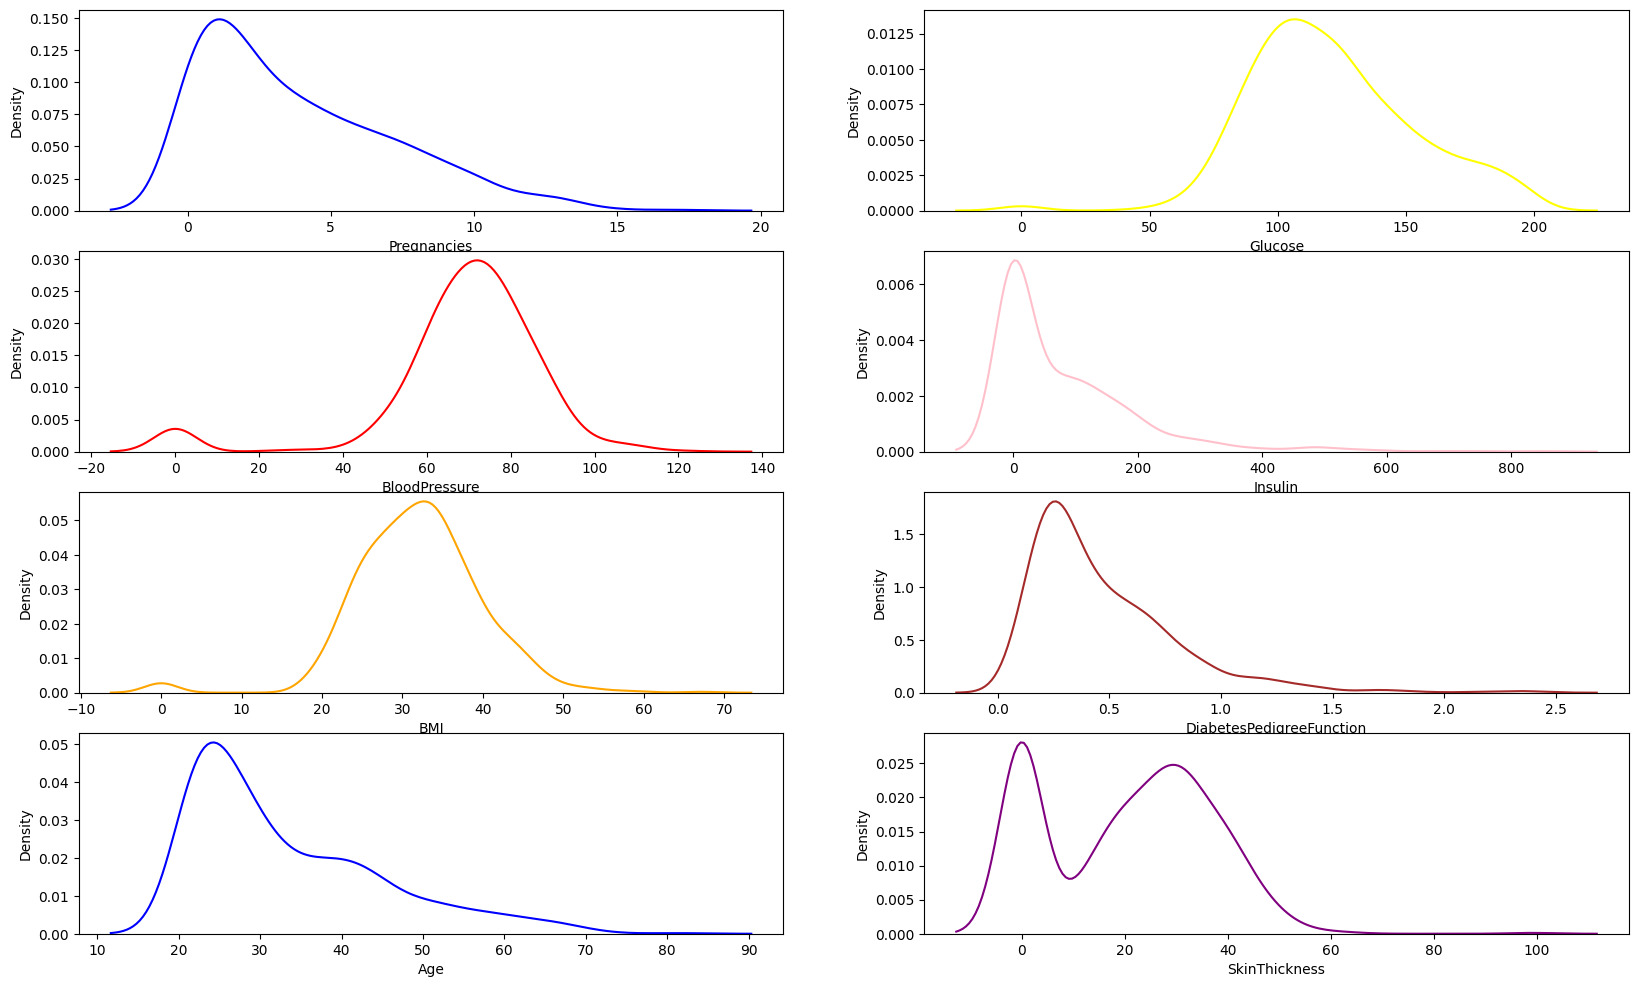

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 12))
ax = sns.kdeplot(data=df, x="Pregnancies", ax=axes[0,0], color='blue')
ax = sns.kdeplot(data=df, x="Glucose", ax=axes[0,1], color='yellow')
ax = sns.kdeplot(data=df, x="BloodPressure", ax=axes[1,0], color='red')
ax = sns.kdeplot(data=df, x="Insulin", ax=axes[1,1], color='pink')
ax = sns.kdeplot(data=df, x="BMI", ax=axes[2,0], color='orange')
ax = sns.kdeplot(data=df, x="DiabetesPedigreeFunction", ax=axes[2,1], color='brown')
ax = sns.kdeplot(data=df, x="Age", ax=axes[3,0], color='blue')
ax = sns.kdeplot(data=df, x="SkinThickness", ax=axes[3,1], color='purple')

In [8]:
stat, p = stats.shapiro(df['BMI'])
print('%0.30f' % p)
if p > 0.05:
    print('Probably normally distributed')
else:
    print('Probably not normally distributed')

0.000000000000001840758660204126
Probably not normally distributed


In [9]:
stat, p = stats.shapiro(df['Glucose'])
print('%0.30f' % p)
if p > 0.05:
    print('Probably normally distributed')
else:
    print('Probably not normally distributed')

0.000000000019874648801709859924
Probably not normally distributed


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [10]:
# there is one outlier (Glucose = 0)
fig = px.box(df, y='Glucose',width=600, height=400)
fig.show()

In [11]:
df[df['Glucose']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
df_G_1 = df[(df['Glucose'] > 0) & (df['Outcome']== 1)]
df_G_0 = df[(df['Glucose'] > 0) & (df['Outcome']== 0)]

In [13]:
# Glucose level can't be zero, so will impute the value using the median becuase glucose data is not mormally distributed
df['Glucose'] = df.apply(lambda x:statistics.median(df_G_1['Glucose']) if ((x['Glucose'] ==0) & (x['Outcome']==1))  else x['Glucose'], axis=1)
df['Glucose'] = df.apply(lambda x:statistics.median(df_G_0['Glucose']) if ((x['Glucose'] ==0) & (x['Outcome']==0))  else x['Glucose'], axis=1)

In [14]:
# There are some outliers in BloodPressure
fig = px.box(df, y='BloodPressure',width=600, height=400)
fig.show()

In [15]:
df[df['BloodPressure']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [16]:
df_B_1 = df[(df['BloodPressure'] > 0) & (df['Outcome']== 1)]
df_B_0 = df[(df['BloodPressure'] > 0) & (df['Outcome']== 0)]

In [17]:
# BloodPressure level can't be zero, so will impute the value using the median becuase BloodPressure data is not mormally distributed
df['BloodPressure'] = df.apply(lambda x:statistics.median(df_B_1['BloodPressure']) if ((x['BloodPressure'] ==0) & (x['Outcome']==1))  else x['BloodPressure'], axis=1)
df['BloodPressure'] = df.apply(lambda x:statistics.median(df_B_0['BloodPressure']) if ((x['BloodPressure'] ==0) & (x['Outcome']==0))  else x['BloodPressure'], axis=1)

In [18]:
# There are some outliers in Age, but it's okay
fig = px.box(df, y='Age',width=600, height=400)
fig.show()

In [19]:
# There are some outliers in Age, but it's okay
fig = px.box(df, y='Insulin',width=600, height=400)
fig.show()

In [20]:
df[df['Insulin']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0
7,10,115.0,70.0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31,0,44.0,0.403,43,1
762,9,89.0,62.0,0,0,22.5,0.142,33,0
764,2,122.0,70.0,27,0,36.8,0.340,27,0
766,1,126.0,60.0,0,0,30.1,0.349,47,1


In [21]:
df_I_1 = df[(df['Insulin'] > 0) & (df['Outcome']== 1)]
df_I_0 = df[(df['Insulin'] > 0) & (df['Outcome']== 0)]

In [22]:
# Insulin level can't be zero, so will impute the value using the median becuase Insulin data is not mormally distributed
df['Insulin'] = df.apply(lambda x:statistics.median(df_I_1['Insulin']) if ((x['Insulin'] ==0) & (x['Outcome']==1))  else x['Insulin'], axis=1)
df['Insulin'] = df.apply(lambda x:statistics.median(df_I_0['Insulin']) if ((x['Insulin'] ==0) & (x['Outcome']==0))  else x['Insulin'], axis=1)

In [23]:
fig = px.box(df, y='BMI',width=600, height=400)
fig.show()

In [24]:
df[df['BMI']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,0,169.5,0.0,0.232,54,1
49,7,105.0,70.0,0,102.5,0.0,0.305,24,0
60,2,84.0,70.0,0,102.5,0.0,0.304,21,0
81,2,74.0,70.0,0,102.5,0.0,0.102,22,0
145,0,102.0,75.0,23,102.5,0.0,0.572,21,0
371,0,118.0,64.0,23,89.0,0.0,1.731,21,0
426,0,94.0,70.0,0,102.5,0.0,0.256,25,0
494,3,80.0,70.0,0,102.5,0.0,0.174,22,0
522,6,114.0,70.0,0,102.5,0.0,0.189,26,0
684,5,136.0,82.0,0,102.5,0.0,0.640,69,0


In [25]:
df_BMI_1 = df[(df['BMI'] > 0) & (df['Outcome']== 1)]
df_BMI_0 = df[(df['BMI'] > 0) & (df['Outcome']== 0)]

In [26]:
# BMI level can't be zero, so will impute the value using the median becuase BMI data is not mormally distributed
df['BMI'] = df.apply(lambda x:statistics.median(df_BMI_1['BMI']) if ((x['BMI'] ==0) & (x['Outcome']==1))  else x['BMI'], axis=1)
df['BMI'] = df.apply(lambda x:statistics.median(df_BMI_0['BMI']) if ((x['BMI'] ==0) & (x['Outcome']==0))  else x['BMI'], axis=1)

In [27]:
fig = px.box(df, y='DiabetesPedigreeFunction',width=600, height=400)
fig.show()

In [28]:

fig = px.box(df, y='Pregnancies',width=600, height=400)
fig.show()

In [29]:
fig = px.box(df, y='SkinThickness',width=600, height=400)
fig.show()

In [30]:
df[df['SkinThickness']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,0,169.5,23.3,0.672,32,1
5,5,116.0,74.0,0,102.5,25.6,0.201,30,0
7,10,115.0,70.0,0,102.5,35.3,0.134,29,0
9,8,125.0,96.0,0,169.5,34.3,0.232,54,1
10,4,110.0,92.0,0,102.5,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,0,169.5,36.3,0.258,52,1
758,1,106.0,76.0,0,102.5,37.5,0.197,26,0
759,6,190.0,92.0,0,169.5,35.5,0.278,66,1
762,9,89.0,62.0,0,102.5,22.5,0.142,33,0


In [31]:
df_ST_1 = df[(df['SkinThickness'] > 0) & (df['Outcome']== 1)]
df_ST_0 = df[(df['SkinThickness'] > 0) & (df['Outcome']== 0)]

In [32]:
# SkinThickness level can't be zero, so will impute the value using the median becuase SkinThickness data is not mormally distributed
df['SkinThickness'] = df.apply(lambda x:statistics.median(df_ST_1['SkinThickness']) if ((x['SkinThickness'] ==0) & (x['Outcome']==1))  else x['SkinThickness'], axis=1)
df['SkinThickness'] = df.apply(lambda x:statistics.median(df_ST_0['SkinThickness']) if ((x['SkinThickness'] ==0) & (x['Outcome']==0))  else x['SkinThickness'], axis=1)

In [33]:
fig = px.histogram(df, x='Outcome', color_discrete_map= {1:'orange', 2:'green'}, color='Outcome', width=600, height=400)
fig.show()

In [34]:
# Separate features from target
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y= df['Outcome']

In [35]:
# Scale the data
from sklearn import preprocessing
MinMaxScaler = preprocessing.MinMaxScaler()
X_minmax = MinMaxScaler.fit_transform(X)

In [36]:
X = pd.DataFrame(X_minmax,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.186899,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.186899,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [37]:
mn = sm.MNLogit(y,sm.add_constant(X))

In [38]:
model = mn.fit()
print_model = model.summary()
print(print_model)


Optimization terminated successfully.
         Current function value: 0.448374
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                Outcome   No. Observations:                  768
Model:                        MNLogit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 27 Jul 2023   Pseudo R-squ.:                  0.3068
Time:                        00:07:43   Log-Likelihood:                -344.35
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.951e-61
               Outcome=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.3165      0.561    -11.255      0.000      -7.416

#### All features are statistically significant except for the Age and BloodPressure. For now we will keep them in the model.

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [39]:
# Separate features from target
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y= df['Outcome']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Build Logistic Regression this will be our bench mark

In [42]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(max_iter=10000)
logre.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
y_logpred = logre.predict(X_test)

In [54]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_logpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_logpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_logpred)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_logpred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_logpred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_logpred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_logpred)))

print('\nClassification Report')
print(classification_report(y_test, y_logpred))

Log loss = 8.65984
AUC = 0.71278
Average Precision = 0.54344

Using 0.5 as threshold:
Accuracy = 0.75974
Precision = 0.69767
Recall = 0.55556
F1 score = 0.61856

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



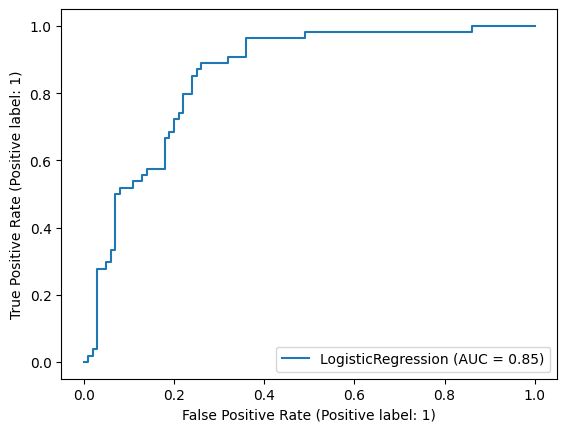

In [47]:
RocCurveDisplay.from_estimator(logre, X_test, y_test)

#### Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_dtcpred = dtc.predict(X_test)

DecisionTreeClassifier(max_depth=5)

In [55]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_dtcpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_dtcpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_dtcpred)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_dtcpred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_dtcpred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_dtcpred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_dtcpred)))

print('\nClassification Report')
print(classification_report(y_test, y_dtcpred))

Log loss = 6.31934
AUC = 0.80111
Average Precision = 0.64969

Using 0.5 as threshold:
Accuracy = 0.82468
Precision = 0.76471
Recall = 0.72222
F1 score = 0.74286

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       100
           1       0.76      0.72      0.74        54

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



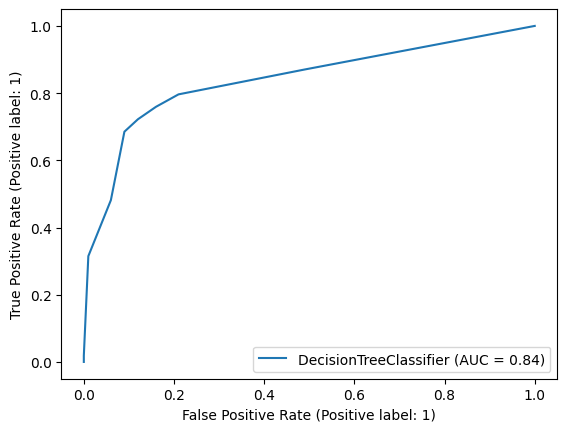

In [51]:
RocCurveDisplay.from_estimator(dtc, X_test, y_test)

#### Random Forest Tree Model

In [56]:
rft = RandomForestClassifier(n_estimators=100, max_depth=5, random_state= 45)
rft.fit(X_train, y_train)
y_rftpred = rft.predict(X_test)

In [57]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_rftpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_rftpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_rftpred)))
print('\nUsing 0.5 as threshold:')

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_rftpred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_rftpred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_rftpred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_rftpred)))

print('\nClassification Report')
print(classification_report(y_test, y_rftpred))

Log loss = 5.61719
AUC = 0.81611
Average Precision = 0.68421

Using 0.5 as threshold:
Accuracy = 0.84416
Precision = 0.81250
Recall = 0.72222
F1 score = 0.76471

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       100
           1       0.81      0.72      0.76        54

    accuracy                           0.84       154
   macro avg       0.84      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



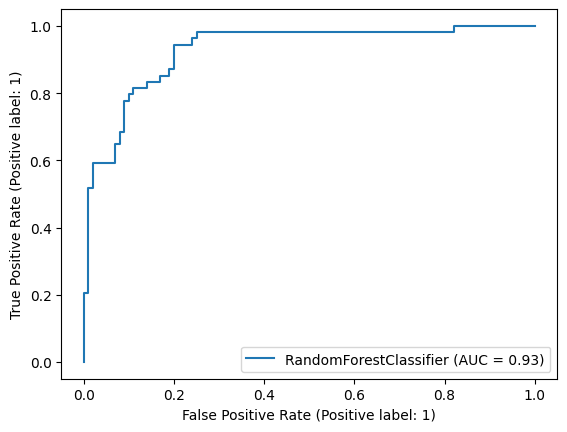

In [58]:
RocCurveDisplay.from_estimator(rft, X_test, y_test)

In [59]:
feature_scores = pd.Series(rft.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Insulin                     0.447671
SkinThickness               0.173234
Glucose                     0.128238
Age                         0.084176
BMI                         0.065361
DiabetesPedigreeFunction    0.041322
Pregnancies                 0.034597
BloodPressure               0.025403
dtype: float64

In [60]:
#remove Age and BloodPressure
X = df[['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
y= df['Outcome']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [62]:
rft = RandomForestClassifier(n_estimators=100, max_depth=5, random_state= 45)
rft.fit(X_train, y_train)
y_rftpred = rft.predict(X_test)

In [63]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_rftpred)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_rftpred)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_rftpred)))
print('\nUsing 0.5 as threshold:')

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_rftpred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_rftpred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_rftpred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_rftpred)))

print('\nClassification Report')
print(classification_report(y_test, y_rftpred))

Log loss = 5.61719
AUC = 0.82463
Average Precision = 0.68306

Using 0.5 as threshold:
Accuracy = 0.84416
Precision = 0.78846
Recall = 0.75926
F1 score = 0.77358

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       100
           1       0.79      0.76      0.77        54

    accuracy                           0.84       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.84      0.84      0.84       154



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The dataset has no missing values, but it has a lot of unrealistic information. e.g. BMI = 0.
- Random Forest Tree gives the best result with 84% accuracy.
- Insulin is the most important feature.
- BloodPressure is the least important, which surprise me!!

